In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi

In [3]:
#Defining parameters of Schechter luminosity function

b=0.4
phi=0.93*10**(-2)*(1)**3
m_char=-20.71+(5*(math.log(1)/math.log(10)))
alpha=-1.26

In [4]:
#Function to calculate galaxy space density as a function of magnitude

def schechterFunc(mag):
    lum_func=b*phi*math.log(10)*10**(-b*(mag-m_char)*(1+alpha))*math.exp(-10**(-b*(mag-m_char)))
    return lum_func #galaxies per Mpc^(3)

In [9]:
schechterFunc(-20)

0.00603625025388807

In [8]:
#Calculating rates for median distance of analogs

radius=0.56175*10**(-3) #[Gpc] Median distance of distance-analogs at scFactor=0.3526 ~10 Gyr
volume=(4/3)*pi*(radius)**3 #[Gpc]^3 Calculating physical volume
time=10**10 #years
r=1/(time*volume);
Rate21=(10**9*schechterFunc(-21))*r;
p1=(-21,Rate21);
Rate20=(10**9*schechterFunc(-20))*r;
p2=(-20,Rate20);
Rate19=(10**9*schechterFunc(-19))*r;
p3=(-19,Rate19);
schechterFunc(-21)

0.0021643914987080795

In [180]:
#Propagating uncertainties

uncRadius=0.4*10**(-3) #absolute uncertainty of radius
uncVolume=math.sqrt(3*(uncRadius/radius)**2); #relative uncertainty of volume
uncRate21=uncVolume*Rate21
uncRate20=uncVolume*Rate20
uncRate19=uncVolume*Rate19

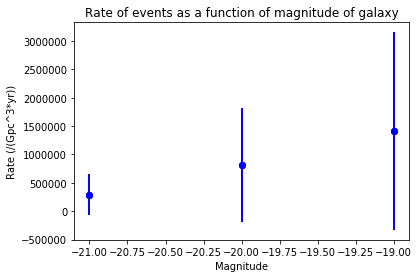

In [189]:
#Plot rate (per volume per year) for different magnitudes

ax=plt.gca()
ax.errorbar([-21,-20,-19],[Rate21,Rate20,Rate19],yerr=[uncRate21,uncRate20,uncRate19],fmt='o',color='b')
ax.set_title("Rate of events as a function of magnitude of galaxy")
ax.set_xlabel("Magnitude")
ax.set_ylabel("Rate (/(Gpc^3*yr))")
#ax.xsc("log")
plt.show()

In [10]:
#Calculate events per year for different LIGO sensibilities

radiusLigo=np.arange(80,120,1)*10**(-3);
volumeLigo=(4/3)*pi*radiusLigo**3;
rate20Year=Rate20*volumeLigo;
rate21Year=Rate21*volumeLigo;
rate19Year=Rate19*volumeLigo;

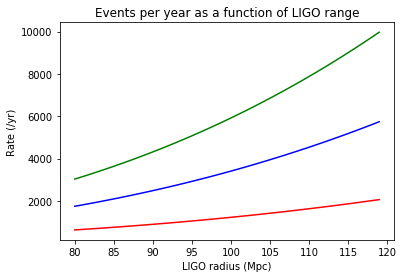

In [177]:
ax2=plt.gca()
ax2.plot(radiusLigo*1000,rate19Year,'-',color='g')
ax2.plot(radiusLigo*1000,rate20Year,'-',color='b')
ax2.plot(radiusLigo*1000,rate21Year,'-',color='r')
ax2.set_title("Events per year as a function of LIGO range")
ax2.set_ylabel("Rate (/yr)")
ax2.set_xlabel("LIGO radius (Mpc)")
plt.show()